#### Instrument - Nifty futures
* Rule - 3 consecutive closing prices in a small range (0.15%)

* Calculated change in closing price after 3 days of the above pattern.

In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import date
import seaborn as sns
sns.set_style("dark")
from copy import deepcopy
import mplfinance as mpf

In [28]:
df = pd.read_csv("NSE_NIFTY1!, 1D.csv")

df["time"] = pd.to_datetime(df["time"])
df = df[df["time"]>"2016-01-01"]
df["date"] = df["time"].dt.date
df["date"] = pd.to_datetime(df["date"])
df = df[["date","open","high","low","close","Volume"]]
df

,date,open,high,low,close,Volume
1998,2016-01-01,7942.00,7994.00,7922.50,7982.00,5857425
1999,2016-01-04,7934.90,7947.75,7792.60,7809.80,16308150
2000,2016-01-05,7831.00,7839.00,7781.00,7802.75,10596450
2001,2016-01-06,7789.00,7824.50,7730.30,7750.05,12153075
2002,2016-01-07,7678.00,7687.90,7570.40,7582.05,16652100
...,...,...,...,...,...,...
3377,2021-08-02,15885.00,15918.20,15841.00,15909.00,5297850
3378,2021-08-03,15947.00,16162.90,15912.55,16146.50,8791250
3379,2021-08-04,16200.00,16294.70,16188.00,16260.80,7309700
3380,2021-08-05,16280.00,16350.00,16220.00,16300.65,6475950


* Calculating log returns instead of simple returns

In [29]:
df["prev_close"] = df["close"].shift(1)
df["returns"] = np.log(df.close/df.prev_close)
df

,date,open,high,low,close,Volume,prev_close,returns
1998,2016-01-01,7942.00,7994.00,7922.50,7982.00,5857425,NaN,NaN
1999,2016-01-04,7934.90,7947.75,7792.60,7809.80,16308150,7982.00,-0.021810
2000,2016-01-05,7831.00,7839.00,7781.00,7802.75,10596450,7809.80,-0.000903
2001,2016-01-06,7789.00,7824.50,7730.30,7750.05,12153075,7802.75,-0.006777
2002,2016-01-07,7678.00,7687.90,7570.40,7582.05,16652100,7750.05,-0.021916
...,...,...,...,...,...,...,...,...
3377,2021-08-02,15885.00,15918.20,15841.00,15909.00,5297850,15777.25,0.008316
3378,2021-08-03,15947.00,16162.90,15912.55,16146.50,8791250,15909.00,0.014818
3379,2021-08-04,16200.00,16294.70,16188.00,16260.80,7309700,16146.50,0.007054
3380,2021-08-05,16280.00,16350.00,16220.00,16300.65,6475950,16260.80,0.002448


In [30]:
df["mod_returns"] = abs(df["returns"])
df

,date,open,high,low,close,Volume,prev_close,returns,mod_returns
1998,2016-01-01,7942.00,7994.00,7922.50,7982.00,5857425,NaN,NaN,NaN
1999,2016-01-04,7934.90,7947.75,7792.60,7809.80,16308150,7982.00,-0.021810,0.021810
2000,2016-01-05,7831.00,7839.00,7781.00,7802.75,10596450,7809.80,-0.000903,0.000903
2001,2016-01-06,7789.00,7824.50,7730.30,7750.05,12153075,7802.75,-0.006777,0.006777
2002,2016-01-07,7678.00,7687.90,7570.40,7582.05,16652100,7750.05,-0.021916,0.021916
...,...,...,...,...,...,...,...,...,...
3377,2021-08-02,15885.00,15918.20,15841.00,15909.00,5297850,15777.25,0.008316,0.008316
3378,2021-08-03,15947.00,16162.90,15912.55,16146.50,8791250,15909.00,0.014818,0.014818
3379,2021-08-04,16200.00,16294.70,16188.00,16260.80,7309700,16146.50,0.007054,0.007054
3380,2021-08-05,16280.00,16350.00,16220.00,16300.65,6475950,16260.80,0.002448,0.002448


### If three consecutive close are very close to each other, sum of returns for 2 consecutive days will be less than a threshold(0.15% or 0.0015)

In [31]:
df["cons3_close"] = df["mod_returns"].rolling(window=2).sum()
df

,date,open,high,low,close,Volume,prev_close,returns,mod_returns,cons3_close
1998,2016-01-01,7942.00,7994.00,7922.50,7982.00,5857425,NaN,NaN,NaN,NaN
1999,2016-01-04,7934.90,7947.75,7792.60,7809.80,16308150,7982.00,-0.021810,0.021810,NaN
2000,2016-01-05,7831.00,7839.00,7781.00,7802.75,10596450,7809.80,-0.000903,0.000903,0.022713
2001,2016-01-06,7789.00,7824.50,7730.30,7750.05,12153075,7802.75,-0.006777,0.006777,0.007680
2002,2016-01-07,7678.00,7687.90,7570.40,7582.05,16652100,7750.05,-0.021916,0.021916,0.028693
...,...,...,...,...,...,...,...,...,...,...
3377,2021-08-02,15885.00,15918.20,15841.00,15909.00,5297850,15777.25,0.008316,0.008316,0.008392
3378,2021-08-03,15947.00,16162.90,15912.55,16146.50,8791250,15909.00,0.014818,0.014818,0.023134
3379,2021-08-04,16200.00,16294.70,16188.00,16260.80,7309700,16146.50,0.007054,0.007054,0.021872
3380,2021-08-05,16280.00,16350.00,16220.00,16300.65,6475950,16260.80,0.002448,0.002448,0.009502


In [32]:
df["signal"] = df["cons3_close"] < 0.0015
df = df.reset_index(drop=True)
df

,date,open,high,low,close,Volume,prev_close,returns,mod_returns,cons3_close,signal
0,2016-01-01,7942.00,7994.00,7922.50,7982.00,5857425,NaN,NaN,NaN,NaN,False
1,2016-01-04,7934.90,7947.75,7792.60,7809.80,16308150,7982.00,-0.021810,0.021810,NaN,False
2,2016-01-05,7831.00,7839.00,7781.00,7802.75,10596450,7809.80,-0.000903,0.000903,0.022713,False
3,2016-01-06,7789.00,7824.50,7730.30,7750.05,12153075,7802.75,-0.006777,0.006777,0.007680,False
4,2016-01-07,7678.00,7687.90,7570.40,7582.05,16652100,7750.05,-0.021916,0.021916,0.028693,False
...,...,...,...,...,...,...,...,...,...,...,...
1379,2021-08-02,15885.00,15918.20,15841.00,15909.00,5297850,15777.25,0.008316,0.008316,0.008392,False
1380,2021-08-03,15947.00,16162.90,15912.55,16146.50,8791250,15909.00,0.014818,0.014818,0.023134,False
1381,2021-08-04,16200.00,16294.70,16188.00,16260.80,7309700,16146.50,0.007054,0.007054,0.021872,False
1382,2021-08-05,16280.00,16350.00,16220.00,16300.65,6475950,16260.80,0.002448,0.002448,0.009502,False


In [33]:
df_sig = df[df.signal]
df_sig

,date,open,high,low,close,Volume,prev_close,returns,mod_returns,cons3_close,signal
17,2016-01-27,7434.00,7473.00,7415.00,7433.40,15695775,7435.45,-0.000276,0.000276,0.000915,True
18,2016-01-28,7431.00,7465.00,7411.00,7424.65,13540050,7433.40,-0.001178,0.001178,0.001454,True
101,2016-06-01,8200.00,8224.90,8178.30,8194.55,9410400,8190.90,0.000446,0.000446,0.000861,True
247,2017-01-03,8200.00,8228.00,8159.00,8196.50,8514525,8192.10,0.000537,0.000537,0.001111,True
248,2017-01-04,8202.25,8223.40,8187.30,8204.05,6797850,8196.50,0.000921,0.000921,0.001458,True
273,2017-02-09,8816.30,8843.80,8733.00,8796.85,11668200,8796.35,0.000057,0.000057,0.001285,True
274,2017-02-10,8829.90,8839.90,8786.55,8809.35,6568125,8796.85,0.001420,0.001420,0.001477,True
276,2017-02-14,8824.00,8830.00,8786.10,8814.85,6714600,8815.35,-0.000057,0.000057,0.000738,True
293,2017-03-10,8975.00,9002.90,8916.40,8958.70,8625600,8954.50,0.000469,0.000469,0.000737,True
325,2017-04-28,9353.15,9358.70,9313.00,9333.70,7361100,9342.15,-0.000905,0.000905,0.000910,True


In [34]:
returns = [] 
for i,row in df[df.signal].iterrows():
    close_price = list((df.loc[i:i+3,"close"]))
    
#     high_price = list((df.loc[i:i+3,"high"]))  # experimented with high prices
   
    returns.append(np.log(close_price[-1]/close_price[0])*100)
returns

[1.7595253499774057,
 0.6751884760575714,
 0.4292413900444637,
 0.8643075157173923,
 0.5573144281437934,
 0.20440963981324914,
 -0.7548839575588906,
 0.13774067822778568,
 2.398259951095615,
 0.4623043777757304,
 0.03585984725737863,
 0.697503012503899,
 0.3695099263627281,
 -2.882541366924142,
 0.10508962508217529,
 0.360164776946821,
 -0.12881328603010483,
 -2.94500348303789,
 0.3051421371852199,
 -2.069121453016828,
 1.3453261752390615,
 0.09468463180028491,
 -0.6633927015187814,
 0.07299659886796107,
 1.9534677859751086,
 -1.9519655705083108,
 3.7357179841328754,
 -1.5263093498616467,
 1.6026104156387107,
 1.4240704494309764]

In [35]:
df_sig.loc[:,"signal_returns"] = returns


In [36]:
df_sig[df["date"]>"2018-01-01"][["date","open","high","low","close","signal_returns"]].reset_index(drop=True)

,date,open,high,low,close,signal_returns
0,2018-01-25,11101.00,11101.0,11011.05,11069.65,-0.128813
1,2018-03-14,10391.35,10438.0,10342.05,10425.35,-2.945003
2,2018-04-23,10579.65,10623.1,10551.30,10585.45,0.305142
3,2018-05-15,10814.75,10947.9,10787.00,10818.60,-2.069121
4,2018-08-23,11614.95,11622.0,11553.30,11595.40,1.345326
5,2019-01-17,10942.95,10958.4,10855.00,10925.85,0.094685
6,2019-01-18,10960.00,10964.0,10875.00,10927.15,-0.663393
7,2019-06-19,11748.65,11815.0,11630.30,11708.60,0.072997
8,2019-10-24,11669.65,11689.0,11557.25,11611.15,1.953468
9,2020-01-17,12345.00,12407.5,12335.00,12384.65,-1.951966


In [37]:
mean_returns = np.mean(returns)
std_returns = np.std(returns,ddof=1)
sample_size = len(returns)
mean_returns,std_returns,sample_size

(0.22228013349398712, 1.4717759007720255, 30)

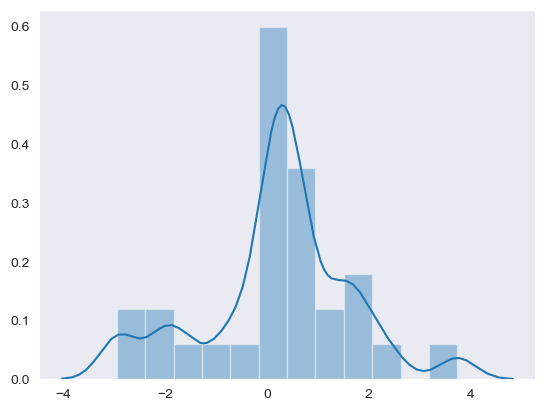

In [38]:
sns.distplot(returns)

In [39]:
import scipy.stats as st



#create 95% confidence interval for returns
st.t.interval(alpha=0.99, df=len(returns)-1, loc=np.mean(returns), scale=st.sem(returns)) 

(-0.5183836004825811, 0.9629438674705554)

### Change startdate to visualize specific events

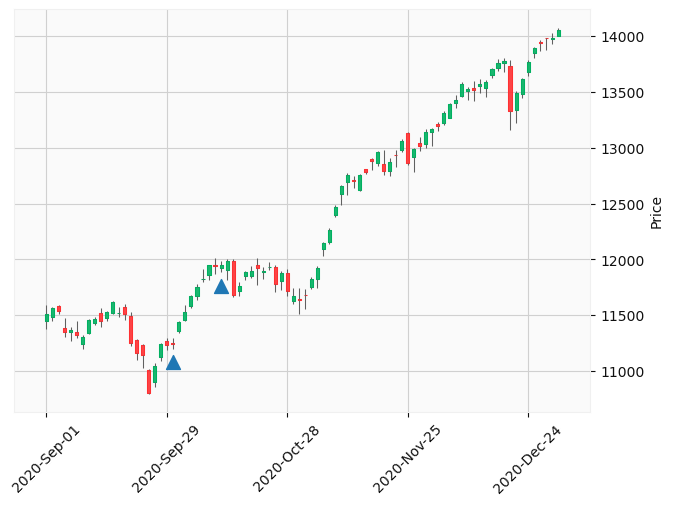

In [40]:
def get_signals(df,threshold=0.0015):
    signals = []

    for date,row in df.iterrows():
        
        
        if (row["cons3_close"] < threshold):
            
            signals.append(df.loc[date].low*0.99)
#             print(f"low {df.loc[date].low}")
        else:
            signals.append(np.nan)
    return signals
        
startdate = date(2020,9,1) #yyyy,mm, dd
enddate = startdate + relativedelta(months = 4)

df.set_index(df["date"],inplace=True)
tempdf = deepcopy(df[startdate:enddate] )


signal_plot = get_signals(tempdf)

apd = mpf.make_addplot(signal_plot,type='scatter',markersize=100,marker='^')

mpf.plot(tempdf, type="candle",style="yahoo",addplot =apd)

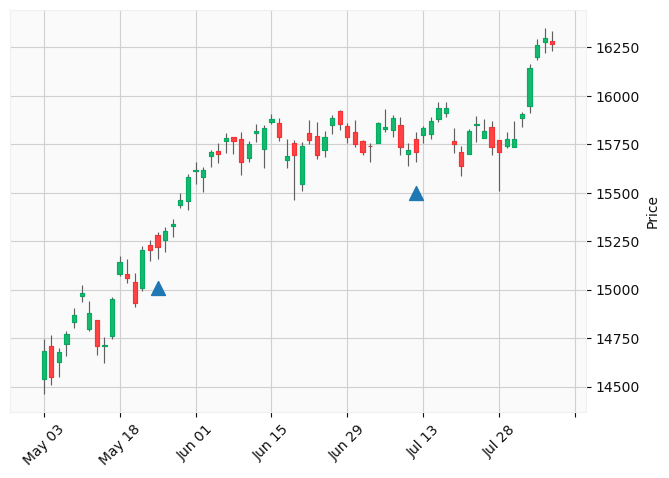

In [26]:
startdate = date(2021,5,1) #yyyy,mm, dd
enddate = startdate + relativedelta(months = 4)

df.set_index(df["date"],inplace=True)
tempdf = deepcopy(df[startdate:enddate] )


signal_plot = get_signals(tempdf)

apd = mpf.make_addplot(signal_plot,type='scatter',markersize=100,marker='^')

mpf.plot(tempdf, type="candle",style="yahoo",addplot =apd)